**#LOADING DATASET**

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


****

In [8]:
df = pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df.drop(['User_ID'], axis=1, inplace=True)

In [11]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


***##Handling Categorical Columns 'Gender'***

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df['Gender']=df['Gender'].map({'F':0, 'M':1})

In [14]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


***##Handling Categorical Columns 'Age'***

In [15]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [16]:
df['Age']=df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


***##Handling Categorical features 'City_Categories'***

In [18]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
df['City_Category']=df['City_Category'].map({'A':1, 'B':2, 'C':3})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969


***##Dropping 'City_Category' column***

In [21]:
df.drop(['City_Category'], axis=1, inplace=True)

In [22]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969


***##Handling Missing_Values***

In [23]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

***###Focus on replacing missing_values***

In [24]:
df['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [25]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

***Replace the missing_values with mode***

In [26]:
 df['Product_Category_2'].isnull().sum()

173638

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 42.0+ MB


In [29]:
mode1 = df['Product_Category_2'].mode()[0]
df['Product_Category_2']=df['Product_Category_2'].fillna(mode1)

In [30]:
df['Product_Category_2'].isnull().sum()

0

***Replacing missing values in 'Product_Category_3'***

In [31]:
df['Product_Category_3'].isnull().sum()

383247

In [32]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [33]:
mode=df['Product_Category_3'].mode()[0]
df['Product_Category_3']=df['Product_Category_3'].fillna(mode)

In [34]:
df['Product_Category_3'].isnull().sum()

0

In [35]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [36]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [37]:
df['Stay_In_Current_City_Years'].isnull().sum()

0

In [38]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969


***##Converting Objects into Integer***

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 42.0+ MB


In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int64  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 42.0+ MB


***VISUALIZATION OF 'AGE' AGAINST 'PURCHASE'***

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns



***##VISUALIZING RELATIONSHIP BETWEEN 'AGE' AGAINST 'PURCHASE'***

<Axes: xlabel='Age', ylabel='Purchase'>

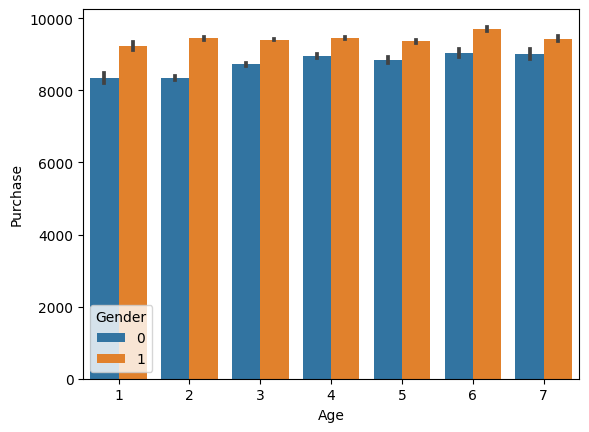

In [43]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)


***##CONCLUSION OF 'GENDER', AGAINST PURCHASE***

In [44]:
##Men have higher purchase than women

***#VISUALIZATION OF 'OCCUPATION' AGAINST 'PURCHASE'***

<Axes: xlabel='Occupation', ylabel='Purchase'>

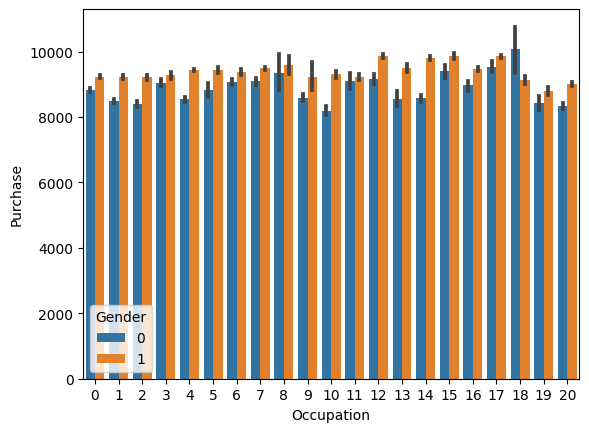

In [45]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

******

***##CONCLUSION***


##MEN IN HIGH OCCUPATION TEND TO SPEND MORE THAN WOMEN IN  THE SAME OCCUPATION 

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

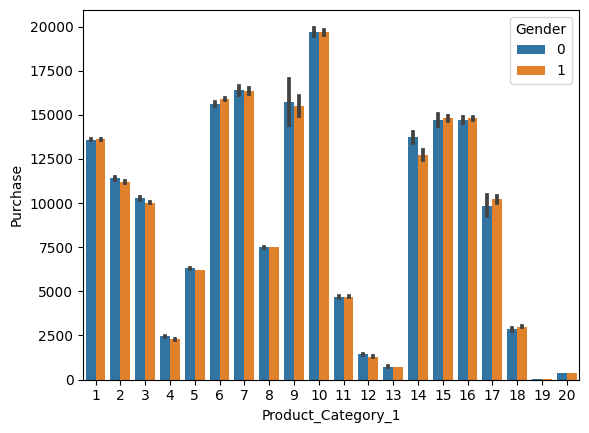

In [46]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

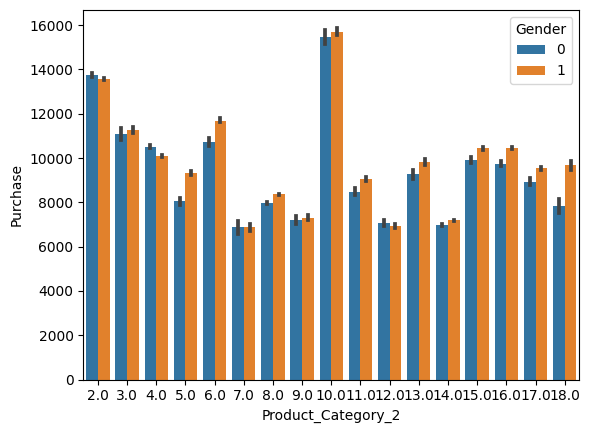

In [48]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

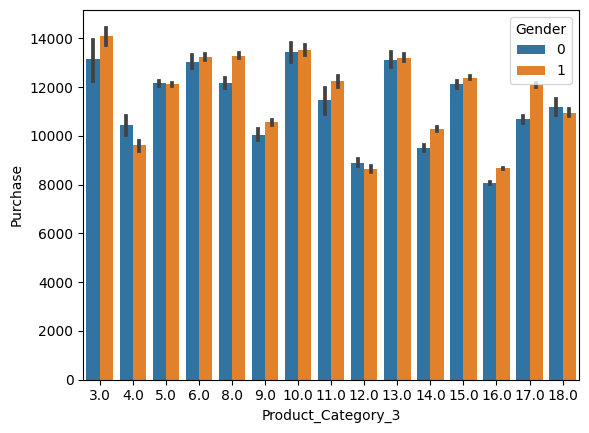

In [49]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [50]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969


***##FEATURE SCALING***

In [54]:
##DROPPING 'Product_ID' because models work with numerical

In [55]:
df.drop(['Product_ID'], axis=1, inplace=True)

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled=scaler.fit_transform(df)

In [57]:
df_scaled


array([[-1.74651251, -1.84424754,  0.29486356, ..., -0.29360542,
         0.36879231, -0.1779729 ],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.75936196,
        -0.36117636,  1.1817558 ],
       [-1.74651251, -1.84424754,  0.29486356, ..., -0.29360542,
         0.36879231, -1.56119326],
       ...,
       [-1.74651251, -0.36673935,  1.06142262, ..., -0.29360542,
         0.36879231, -1.81701338],
       [-1.74651251,  2.58827703, -1.08494277, ..., -0.29360542,
         0.36879231, -1.77162273],
       [-1.74651251,  1.11076884, -1.23825458, ..., -0.29360542,
         0.36879231, -1.7467375 ]])